In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Data load

In [3]:
data=pd.read_table('datos/datos.txt')

In [4]:
#data=pd.read_csv("datos2.csv")
#data=data.rename(columns={'Unnamed: 0':'No'})
#data=data.drop('No',axis=1)

In [5]:
data

,X,Y,RV
0,128.736,19.6,-289.157579
1,127.395,19.6,-288.746455
2,126.054,19.6,-289.568704
3,124.713,19.6,-285.548819
4,123.372,19.6,-283.950002
...,...,...,...
325,91.188,0.0,-261.612236
326,89.847,0.0,-264.124664
327,88.506,0.0,-264.764191
328,87.165,0.0,-263.530817


Bidimensional Data Display

(83.6784, 130.8816, -0.9800000000000001, 20.580000000000002)

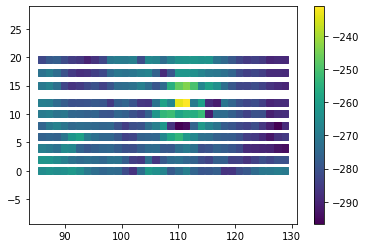

In [6]:
plt.scatter(data.X,data.Y,c=data.RV, s=50,marker='s')
plt.colorbar()
plt.axis('equal')

Autocorrelation Function:
$$R(l)=\langle {\vert \overrightarrow{v}(\overrightarrow{x}+\overrightarrow{l})\overrightarrow{v}(\overrightarrow{x}) \vert} \rangle $$
applied to the bidimensional map.

Data Rearrange

In [7]:
df1=abs(data)
df1n=df1.to_numpy()

xl=[row[0] for row in df1n]
yl=[row[1] for row in df1n]
fl=[row[2] for row in df1n]

x1=[xl]
y1=[yl]
f1=[fl]

x=list(map(list, zip(*x1)))
y=list(map(list, zip(*y1)))
f=list(map(list, zip(*f1)))

Function code

In [8]:
sig2=2*(data.RV.var())#Change to header third column
fm=np.nanmean(f)
fv=np.nanvar(f,ddof=1)
fs=np.nanstd(f,ddof=1)
l=len(f)
S=[[fm],[fv],[fs],[l]]

In [9]:
a=[[0]*(l) for i in range(l)]
b=[[0]*(l) for i in range(l)]
c=[[0]*(2) for i in range(l*l)]

In [10]:
#Autocorrelation Function Matrix [LxL]

f=f-np.nanmean(f)

for i in range(l):
    for j in range(l):
        if i > j:
            a[i][j]=(f[j][0]*f[i][0])/fv

In [11]:
#Coord Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            b[i][j]=((x[i][0]-x[j][0])**2+(y[i][0]-y[j][0])**2)**0.5 

In [12]:
#LxL to Lx2
#Main Matrix  [(L*L)x2]
for j in range (l):
    for i in range (l):
        c[i+j*(l)][1]=a[i][j]

for j in range (l):
    for i in range (l):
        c[i+j*(l)][0]=b[i][j]

In [13]:
#pd.DataFrame(a)

In [14]:
#pd.DataFrame(b)

In [15]:
#Filter: Greater than "0"
d=np.asarray(c)
ind=np.squeeze(d[:,0])>0.0
e=d[ind]

df=pd.DataFrame(e)
df.columns=['lag','qvd']#squared velocities difference
df.describe()

,lag,qvd
count,54285.000000,54285.000000
mean,17.753445,-0.003030
std,9.501559,0.990949
min,1.341000,-9.910167
25%,10.353411,-0.306520
50%,16.458493,-0.000517
75%,24.159951,0.316829
max,47.176263,19.949954


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


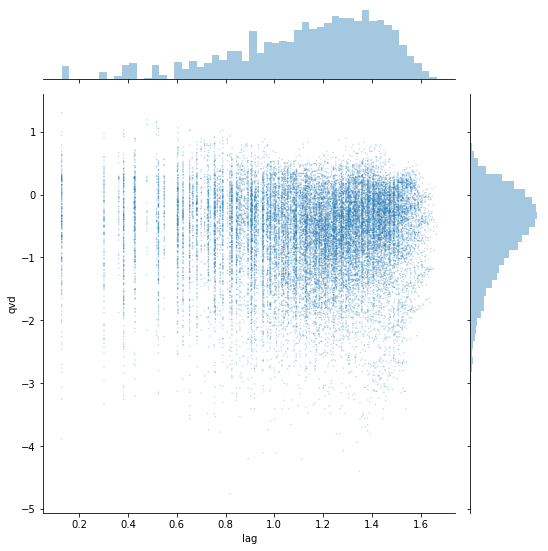

In [16]:
ax=sns.jointplot(x=np.log10(df.lag), y=np.log10(df.qvd), alpha=0.3, s=2, edgecolor='none')
ax.fig.set_size_inches(8,8)

Function Data Groups

In [17]:
m=1.341#separation between lags mib valu=min lag

In [18]:
n=int(df.lag.max())//m#Number of points

In [19]:
#Grouping points
dfx=dict()

for i in range(int(n)):
    p=0+i*m
    q=m+i*m
    dfx[i]=df[df['lag'].between(p,q)]

In [20]:
dfx

{0:          lag       qvd
 0      1.341  1.850572
 329    1.341  1.907350
 984    1.341  0.852857
 2282   1.341 -0.047171
 2604   1.341  0.072026
 ...      ...       ...
 54207  1.341  0.709778
 54240  1.341  0.009854
 54257  1.341  0.155560
 54275  1.341  1.749631
 54282  1.341  1.429184
 
 [160 rows x 2 columns],
 1:             lag       qvd
 1      2.682000  1.967722
 32     2.300000  1.863589
 33     2.662383  1.818031
 360    2.662383  1.806412
 361    2.300000  1.762252
 ...         ...       ...
 54270  1.341000  1.653445
 54271  2.682000  1.359770
 54276  2.682000  1.653445
 54279  1.341000  1.359770
 54284  1.341000  1.393552
 
 [1056 rows x 2 columns],
 2:             lag       qvd
 2      4.023000  1.394990
 34     3.533146  1.824539
 330    2.682000  1.352190
 331    4.023000  1.131388
 363    3.533146  1.232326
 ...         ...       ...
 54266  4.023000  0.738253
 54272  4.023000  1.285016
 54277  4.023000  1.838946
 54280  2.682000  1.512324
 54283  2.682000  1.252979


In [21]:
len(dfx)

35

Main Matrix Statistical Properties Groups

In [22]:
lgp=dict()
dl=dict()
dery=dict()
dfm=dict()
dfv=dict()
dfs=dict()
derx=dict()
dlm=dict()
dlv=dict()
dls=dict()

In [23]:
n=len(dfx)

for i in range(n):
    lgp[i]=(dfx[i]["lag"].max())
    dl[i]=len(dfx[i])#Numer of points each group
    #errorY
    dfm[i]=dfx[i]["qvd"].mean()
    dfv[i]=dfx[i]["qvd"].var()
    dfs[i]=dfx[i]["qvd"].std()
    if dl[i]>0:
        dery[i]=dfs[i]/np.sqrt(dl[i])
    #errorX
    dlm[i]=dfx[i]["lag"].mean()
    dlv[i]=dfx[i]["lag"].var()
    dls[i]=dfx[i]["lag"].std()
    if dl[i]>0:
        derx[i]=dls[i]/np.sqrt(dl[i])  


In [24]:
g=[[0]*(7) for i in range(n)]

for i in range(n):

    g[i][0]=lgp[i]
    g[i][1]=dfm[i]
    g[i][2]=dery[i]
    g[i][3]=dfs[i]
    g[i][4]=dfv[i]
    g[i][5]=dl[i]
    g[i][6]=derx[i]

In [25]:
sf=pd.DataFrame(g)
sf.columns=['Lag','Nmqvd','ErrY','StD','Var','# P','ErrX']

sf.loc[-1]=[0,1,0,0,0,1,0]
sf.index=sf.index+1
sf.sort_index(inplace=True)


sf.describe()

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,23.449485,-0.016529,0.041201,0.920901,0.952580,1522.611111,0.015026
std,14.098219,0.383425,0.060302,0.327882,0.761132,1038.558542,0.015761
min,0.000000,-0.640184,0.000000,0.000000,0.000000,1.000000,0.000000
25%,11.733750,-0.218905,0.018387,0.766705,0.587853,646.500000,0.008126
50%,23.467500,-0.012664,0.020609,0.868228,0.753844,1388.000000,0.010697
75%,35.201250,0.127397,0.033717,1.040323,1.082397,2568.750000,0.014365
max,46.381028,1.000000,0.335118,2.133775,4.552998,3120.000000,0.085072


In [26]:
sf

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
0,0.000000,1.000000,0.000000,0.000000,0.000000,1,0.000000e+00
1,1.341000,0.989205,0.168690,2.133775,4.552998,160,4.738173e-16
2,2.682000,0.494756,0.038769,1.259831,1.587174,1056,1.332567e-02
3,4.023000,0.418222,0.046939,1.583439,2.507278,1138,1.355315e-02
4,5.364000,0.377710,0.031195,1.309095,1.713730,1761,9.572106e-03
5,6.705000,0.271553,0.022796,1.143437,1.307448,2516,8.958983e-03
6,8.046000,0.187698,0.023959,1.033851,1.068849,1862,8.591889e-03
7,9.387000,0.096569,0.017178,0.903786,0.816828,2768,8.121880e-03
8,10.728000,0.030260,0.015587,0.849911,0.722349,2973,7.325619e-03
9,12.069000,-0.028153,0.016141,0.873086,0.762279,2926,7.462187e-03


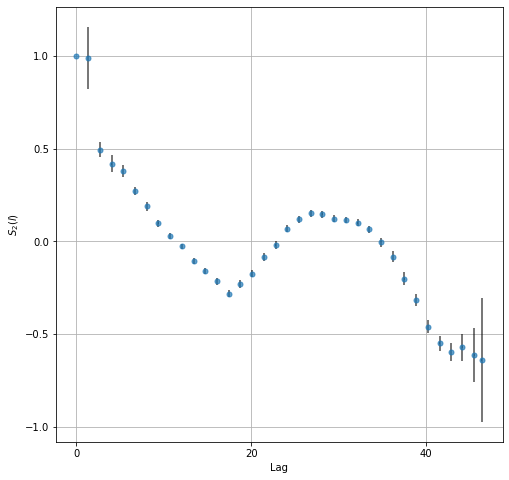

In [27]:
fig, ax=plt.subplots(figsize=(8,8))
ax.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt="o", ecolor='k', alpha=0.7, markersize=5)
#ax.set(xscale='log',yscale='log')
ax.set(xlabel='Lag', ylabel='$S_{2}(l)$')
plt.grid(True, which="both", ls="-")

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="25"

In [28]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.773758172988892 seconds ---
